<a href="https://colab.research.google.com/github/TemitopeOladokun/Data-Augmentation/blob/master/Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torchvision.transforms as transforms
import glob
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import time
import albumentations as A
 
from torch.utils.data import DataLoader, Dataset
from PIL import Image

In [0]:
image_list = glob.glob('/content/drive/My Drive/ABI/Glass/0197180a-1f09-4c4b-9976-643bef44ba39.jpg')
print(len(image_list))

1


In [0]:
transform = transforms.Compose([
     transforms.ToPILImage(),
     transforms.Resize((300, 300)),
    #transforms.CenterCrop((100, 100)),
    #transforms.RandomCrop((80, 80)),
     transforms.RandomHorizontalFlip(p=0.5),
     transforms.RandomRotation(degrees=(0, 90)),
     transforms.RandomVerticalFlip(p=0.5),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
     ])

In [0]:
class PyTorchImageDataset(Dataset):
    def __init__(self, image_list, transforms=None):
        self.image_list = image_list
        self.transforms = transforms
         
    def __len__(self):
        return (len(self.image_list))
    
    def __getitem__(self, i):
        image = plt.imread(self.image_list[i])
        image = Image.fromarray(image).convert('RGB')        
        image = np.asarray(image).astype(np.uint8)
        if self.transforms is not None:
            image = self.transforms(image)
            
        return torch.tensor(image, dtype=torch.float)

In [0]:
pytorch_dataset = PyTorchImageDataset(image_list=image_list, 
                                      transforms=transform)

pytorch_dataloader = DataLoader(dataset=pytorch_dataset, 
                                batch_size=16, 
                                shuffle=True)

In [0]:
def show_img(img):
    plt.figure(figsize=(50,45))
    # unnormalize
    img = img / 2 + 0.5  
    npimg = img.numpy()
    npimg = np.clip(npimg, 0., 1.)
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  app.launch_new_instance()


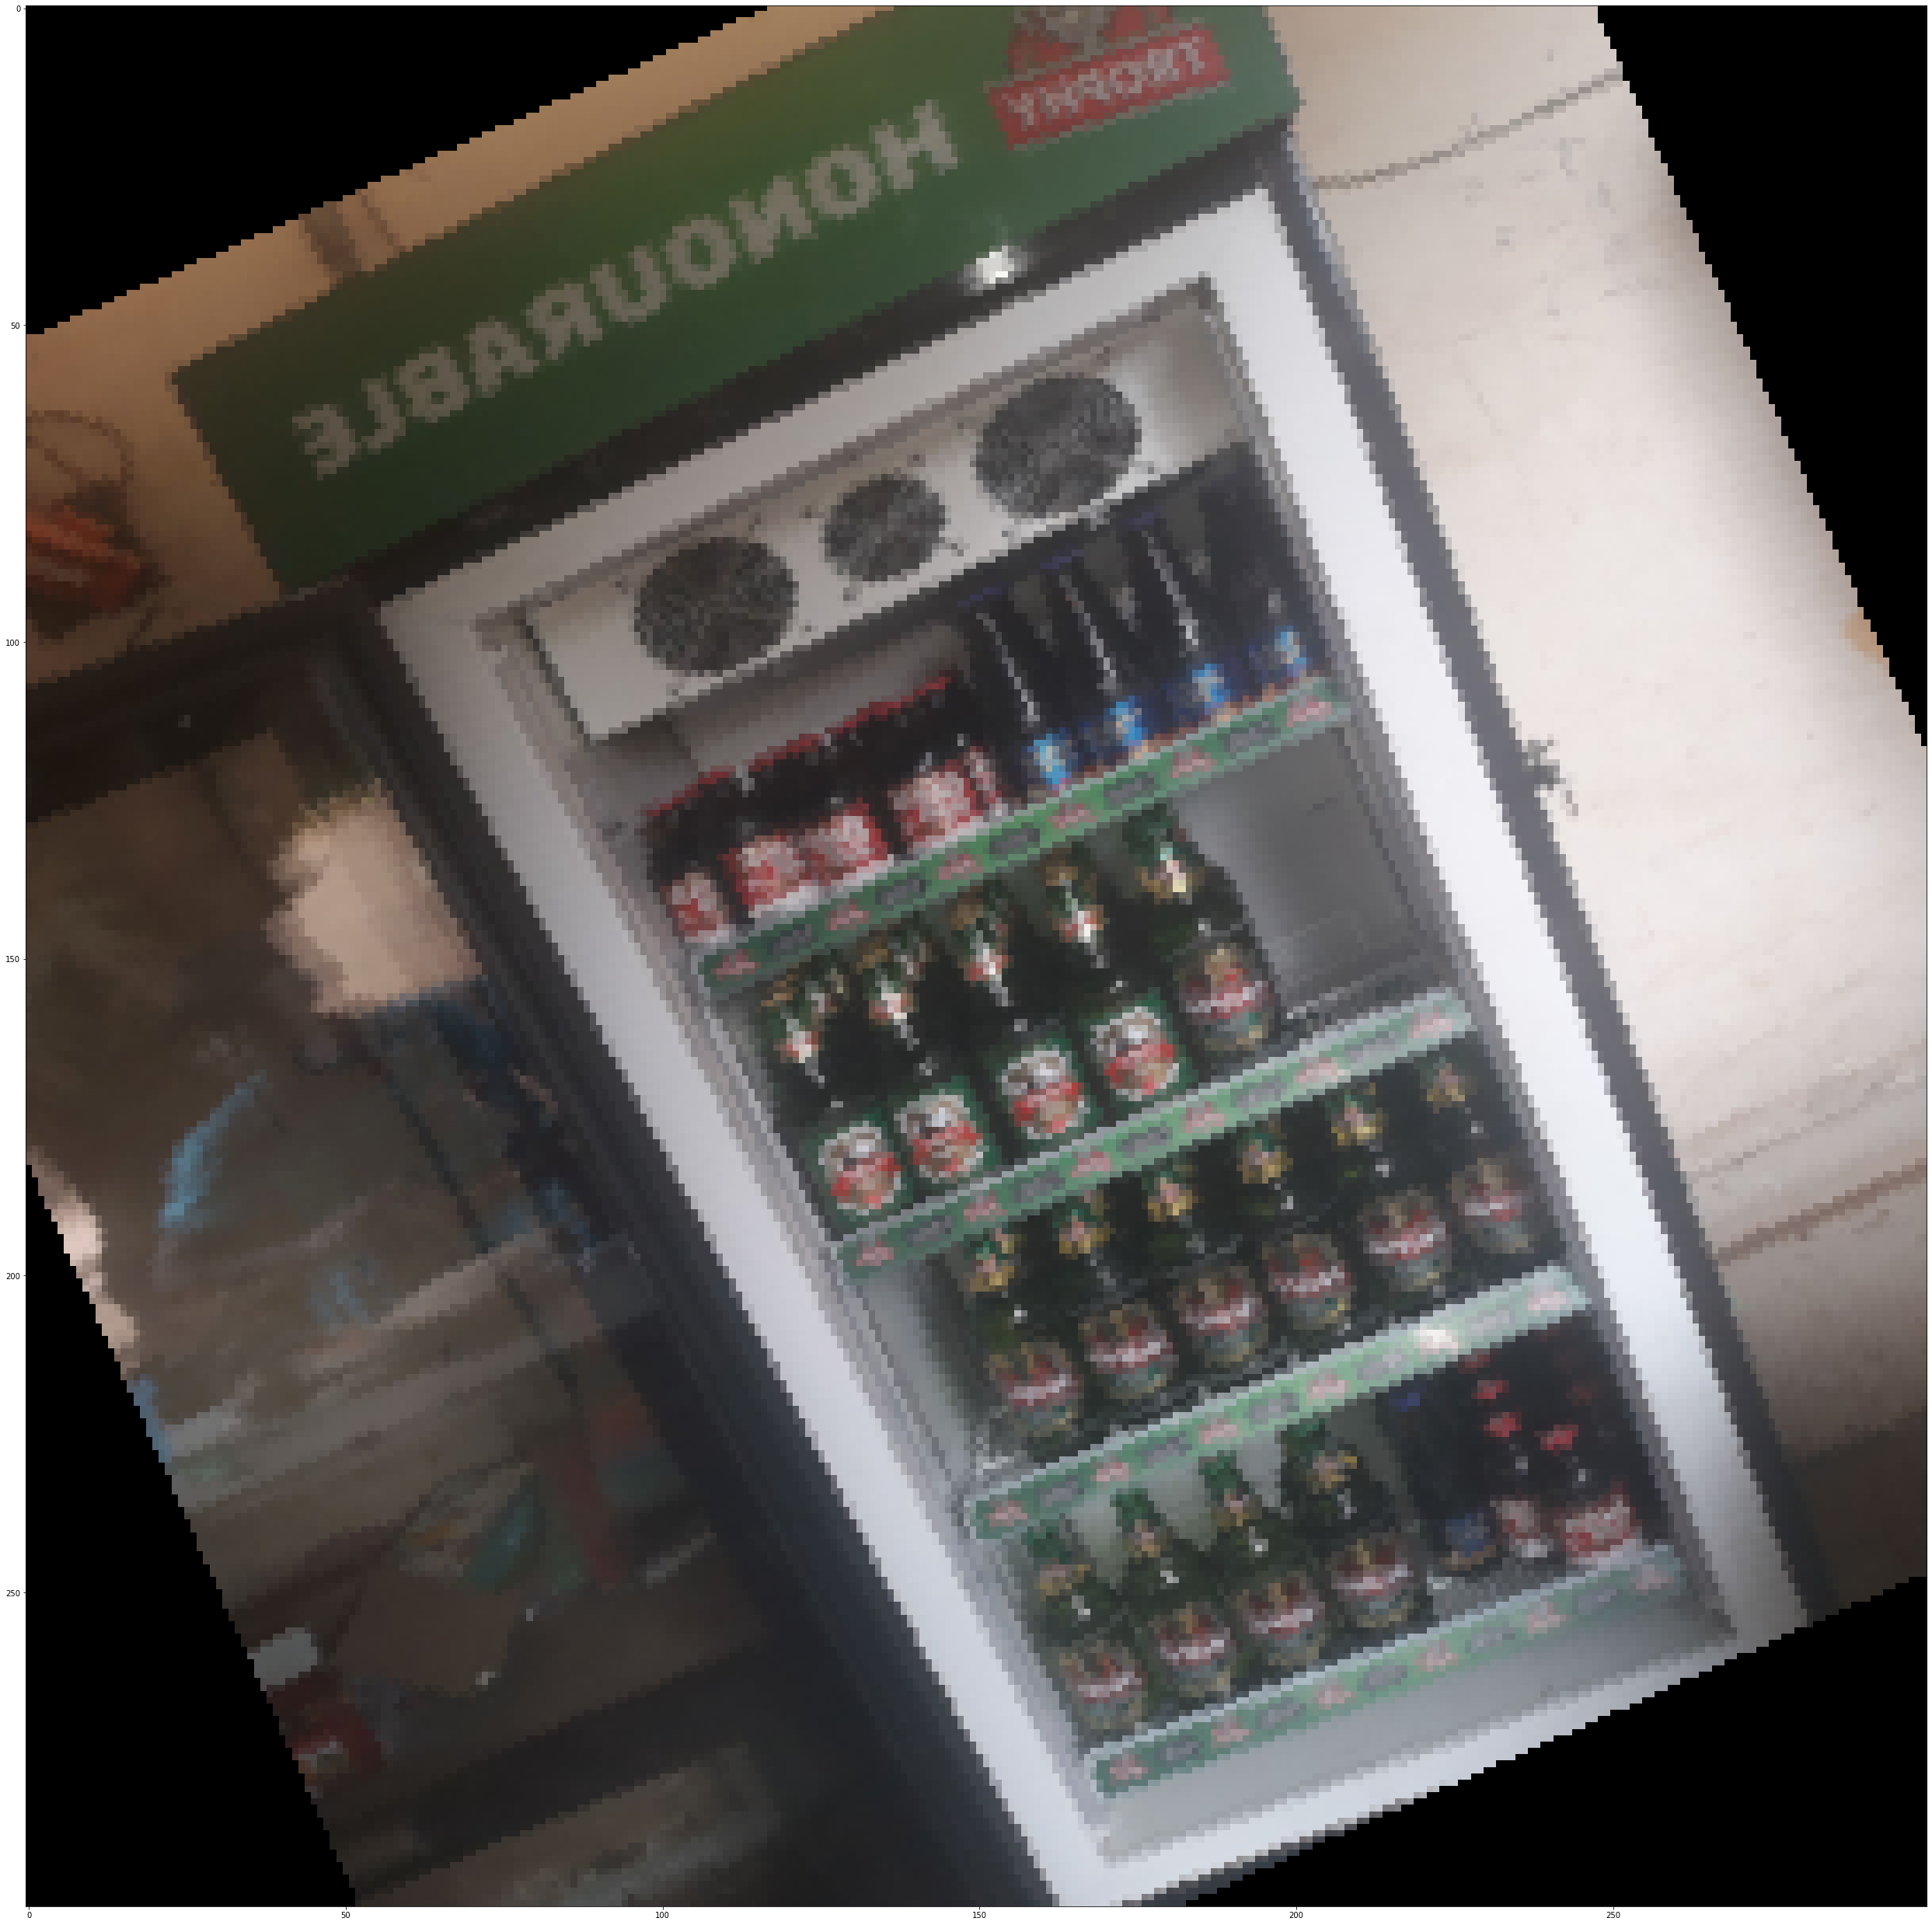

In [0]:
data = iter(pytorch_dataloader)
images = data.next()
 
# show images
show_img(torchvision.utils.make_grid(images))

In [0]:
start = time.time()
for i, data in enumerate(pytorch_dataloader):
    images = data
end = time.time()
time_spent = (end-start)/60
print(f"{time_spent:.3} minutes")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  app.launch_new_instance()


In [0]:
#torch.save(images, "/content/drive/My Drive/ABI")